In [26]:
import numpy as np
import pandas as pd

boston = pd.read_csv('datasets/boston.csv', index_col='Unnamed: 0')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [27]:
# Print number of rows and columns
print(f'There are {boston.shape[0]} rows and {boston.shape[1]} columns')

There are 506 rows and 13 columns


In [28]:
# Information of the dataset
boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='dis', ylabel='age'>,
        <Axes: xlabel='crim', ylabel='age'>,
        <Axes: xlabel='zn', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='dis'>,
        <Axes: xlabel='dis', ylabel='dis'>,
        <Axes: xlabel='crim', ylabel='dis'>,
        <Axes: xlabel='zn', ylabel='dis'>],
       [<Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>],
       [<Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>]], dtype=object)

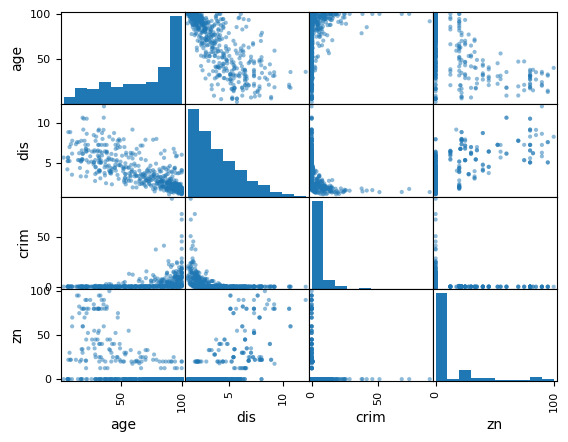

In [29]:
# Pairwise plotting of the dataset
pd.plotting.scatter_matrix(boston[['age', 'dis', 'crim', 'zn']])

In [30]:
# see the value counts for columns in the dataset
print(boston.value_counts())
print(f'The number of uniques values in each column is {boston.nunique()}')

crim      zn    indus  chas  nox    rm     age    dis      rad  tax  ptratio  lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296  15.3     4.98   24.0    1
1.00245   0.0   8.14   0     0.538  6.674  87.3   4.2390   4    307  21.0     11.98  21.0    1
1.38799   0.0   8.14   0     0.538  5.950  82.0   3.9900   4    307  21.0     27.71  13.2    1
1.35472   0.0   8.14   0     0.538  6.072  100.0  4.1750   4    307  21.0     13.04  14.5    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5    403  14.7     6.43   24.3    1
                                                                                            ..
0.11027   25.0  5.13   0     0.453  6.456  67.8   7.2255   8    284  19.7     6.73   22.2    1
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273  21.0     6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384  20.9     13.00  21.7    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.58

array([<Axes: title={'center': 'age'}, xlabel='chas'>,
       <Axes: title={'center': 'indus'}, xlabel='chas'>], dtype=object)

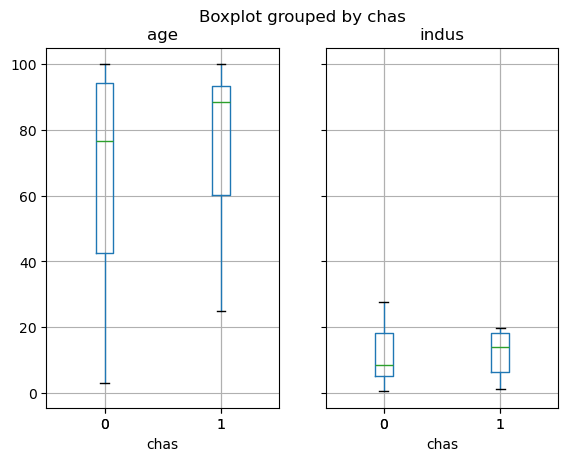

In [31]:
boston.boxplot(column=['age', 'indus'], by='chas')

In [32]:
# Predictors associated with per capita income
print(boston.corrwith(boston['crim']).sort_values(ascending=False))

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
dtype: float64


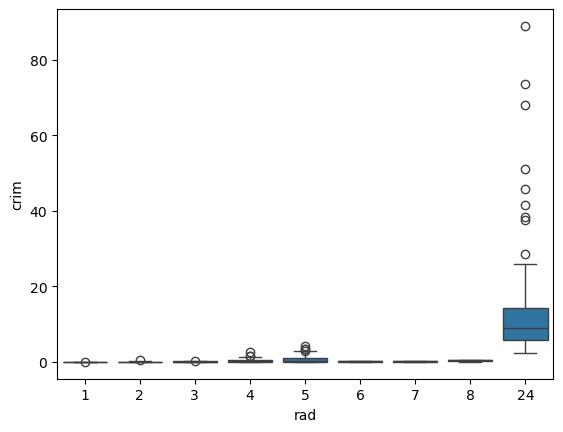

In [34]:
# We will look with the top three with the largest correlation
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='rad', y='crim', data=boston)
plt.show()

> *Findings*: When RAD is equal to 24 (it's highest value the average crim is much higher and crim range is much larger)

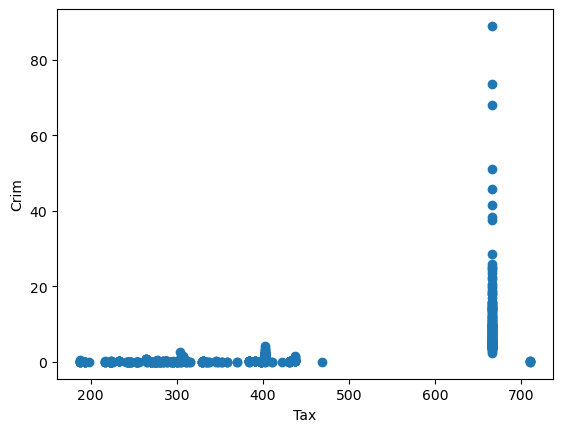

In [36]:
# Second with high correlation
plt.scatter(boston['tax'], boston['crim'])
plt.xlabel('Tax')
plt.ylabel('Crim')
plt.show()

> *Findings*: When the TAX equal to 6xx, average Crime rate is much higher and crim range is much larger

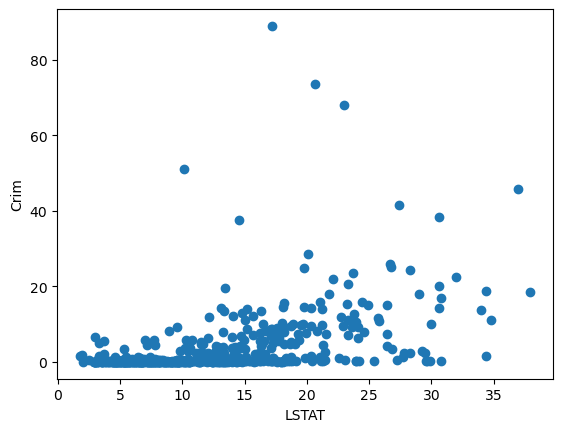

In [37]:
# We also look at the third with high correlation
plt.scatter(boston['lstat'], boston['crim'])
plt.xlabel('LSTAT')
plt.ylabel('Crim')
plt.show()

d. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [38]:
boston.loc[boston['crim'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0


In [39]:
boston.loc[boston['tax'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


In [40]:
boston.loc[boston['ptratio'].nlargest(5).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
355,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
356,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
129,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
130,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3


In [41]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


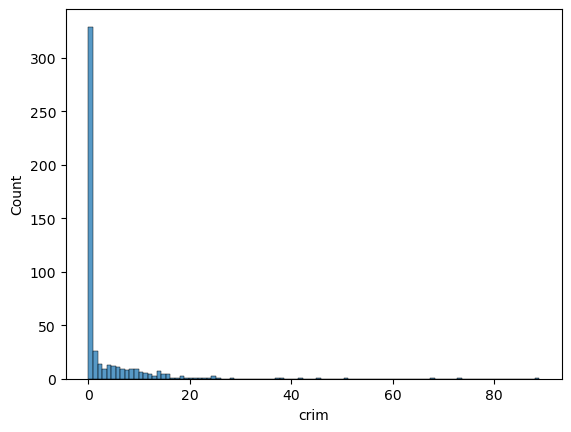

In [47]:
ax = sns.histplot(boston['crim'])
plt.show()

 *Findings* the 5 towns in crim table are very high, all the towns shown in tax table have max tax level,
 also pratio table shows towns with high pupil teacher ratios but not so even

e. Suburb in charles

In [49]:
print(boston['chas'].value_counts())
# The answer is 35.

chas
0    471
1     35
Name: count, dtype: int64


In [51]:
# Median pupil-teacher ratio
print(boston['ptratio'].median())

19.05
